### Parallel workflow

 Start---       |-- Strike Rate
        |
        |-- Boundary percentage
        |
        |-- Ball per boundary

In [41]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [42]:
# Create state
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    strike_rate: float
    boundary_percentage: float
    balls_per_boundary: float
    summary: str

In [ ]:
# Function to calculate strike rate
def cal_sr(state:BatsmanState)->BatsmanState:
    sr = (state["runs"])/state["balls"]*100
    
    return {"strike_rate": sr}

# Funtion to calculate boundary percentage
def cal_bp(state: BatsmanState)-> BatsmanState:
    bp = (state["fours"] + state["sixes"])/state["balls"]*100
    # state["boundary_percentage"] = bp  we're not doing this because it can conflicting the others stat values as well
    return {"boundary_percentage":bp}

# Fuction to calculate balls per boundary
def cal_bperb(state:BatsmanState)-> BatsmanState:
    bperb = state["balls"]/(state["fours"] + state["sixes"])
    # state["balls_per_boundary"] = bperb (doing partial updates)
    return {"balls_per_boundary": bperb}

# Fuunction for summary
def summary(state: BatsmanState)->BatsmanState: 
    summary = f"""The batsman scored {state['runs']} \n
    runs off {state['balls']} balls with a strike rate of {state['strike_rate']:.2f}.
    He hit {state['fours']} fours 
    and {state['sixes']} sixes, 
    resulting in a boundary percentage of {state['boundary_percentage']:.2f}%. On average,
    he hit a boundary every {state['balls_per_boundary']:.2f} balls"""
    # state["summary"] = summary
    return {"summary":summary}


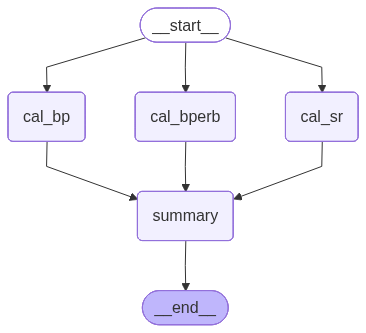

In [44]:
# Create the graph
graph = StateGraph(BatsmanState)

# Create nodes
graph.add_node("cal_sr", cal_sr)
graph.add_node("cal_bp", cal_bp)
graph.add_node("cal_bperb", cal_bperb)
graph.add_node("summary", summary)

# Create edges
graph.add_edge(START, "cal_sr")
graph.add_edge(START, "cal_bp")
graph.add_edge(START, "cal_bperb")

graph.add_edge("cal_sr", "summary")
graph.add_edge("cal_bp", "summary")
graph.add_edge("cal_bperb", "summary")

graph.add_edge("summary", END)
# compile graph
workflow = graph.compile()
workflow

In [46]:
initial_state = {
    "runs": 100,
    "balls":30,
    "fours":6,
    "sixes":10
}

final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 100, 'balls': 30, 'fours': 6, 'sixes': 10, 'strike_rate': 333.33333333333337, 'boundary_percentage': 53.333333333333336, 'balls_per_boundary': 1.875, 'summary': 'The batsman scored 100 \n\n    runs off 30 balls with a strike rate of 333.33.\n    He hit 6 fours \n    and 10 sixes, \n    resulting in a boundary percentage of 53.33%. On average,\n    he hit a boundary every 1.88 balls'}
